In [2]:
import cv2
import face_recognition
import matplotlib.pyplot as plt

def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV 默认使用 BGR 通道加载图像，转换为 RGB 图像
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

[(126, 305, 216, 215), (66, 534, 156, 444), (72, 370, 146, 295), (32, 446, 94, 384), (39, 182, 168, 53)]


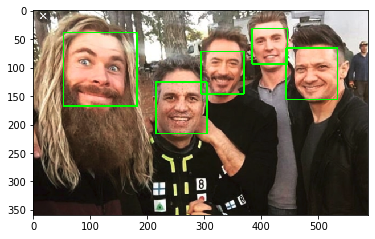

In [3]:
# Find all faces from a picture.

imagePath = "images/marvel_002.png"
image = load_image(imagePath)
face_locations = face_recognition.face_locations(image)

print(face_locations)

for location in face_locations:
    top, right, bottom, left = location
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    
plt.imshow(image)
plt.show()

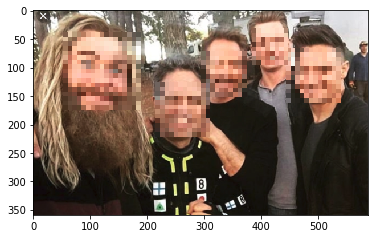

In [4]:
# Convert to mosaic for all faces.          
def convert_mosaic(img, left, top, width, height, size=8):
    for i in range(0, width, size):
        for j in range(0, height, size):
            rect  = [left + i, top + j, size, size]
            color = img[top + j][left + i].tolist()
            point1 = (rect[0], rect[1]) # Vertex of the rectangle.
            point2 = (rect[0] + size - 1, rect[1] + size - 1) # Vertex of the rectangle opposite to pt1 .
            cv2.rectangle(img, point1, point2, color, -1)
            
    
image = load_image(imagePath)
for location in face_locations:
    top, right, bottom, left = location
    convert_mosaic(image, left, top, right - left, bottom - top)    

plt.imshow(image, cmap="gray")
plt.show()    